# 03 — Exploratory Data Analysis (EDA): Trend Emission ASEAN (2000–2024)
Notebook ini berfokus pada eksplorasi tren emisi karbon negara ASEAN periode 2000–2024.
Tahapan utama:
* memanggil dataset hasil olahan dari folder data/process
* merapikan nama kolom agar lebih mudah dibaca
* membuat pengelompokan waktu per 4 tahun untuk melihat tren secara lebih stabil
* membuat visualisasi tren emisi

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [64]:
url = "https://raw.githubusercontent.com/AlvitoDwiP/carbon-emission/refs/heads/main/data/process/owid_co2_asean_2000_2024.csv"
df = pd.read_csv(url)
df.shape

(250, 79)

Dataset telah sesuai scope ASEAN dan rentang tahun 2000–2024, sehingga siap dipakai untuk eksplorasi tren.

## Column Renaming
Beberapa nama kolom dirapikan agar:
- lebih singkat
- lebih konsisten
- lebih mudah dibaca saat visualisasi dan interpretasi

Rename dilakukan tanpa mengubah makna data.

In [65]:
rename_map = {
    "country": "country",
    "year": "year",
    "population": "population",
    "co2": "co2_total",
    "co2_per_capita": "co2_per_capita",
    "coal_co2": "co2_coal",
    "oil_co2": "co2_oil",
    "gas_co2": "co2_gas",
    "cement_co2": "co2_cement",
    "flaring_co2": "co2_flaring"
}

df = df.rename(columns=rename_map)
df.columns


Index(['country', 'year', 'iso_code', 'population', 'gdp', 'co2_cement',
       'cement_co2_per_capita', 'co2_total', 'co2_growth_abs',
       'co2_growth_prct', 'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'co2_coal',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'co2_flaring', 'flaring_co2_per_capita', 'co2_gas',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'land_use_change_co2', 'land_use

Nama kolom menjadi lebih jelas, terutama untuk membedakan total emisi dan kontribusi berdasarkan sumber emisi.

Untuk menjaga fokus analisis, kolom yang digunakan dipersempit pada variabel inti yang paling relevan untuk tren emisi.

In [66]:
cols = [
    "country",
    "year",
    "population",
    "co2_total",
    "co2_per_capita",
    "co2_coal",
    "co2_oil",
    "co2_gas",
    "co2_cement",
    "co2_flaring"
]

df_eda = df[cols].copy()
df_eda.shape


(250, 10)

Dataset df_eda berisi variabel inti untuk analisis tren, sehingga visualisasi lebih jelas dan tidak terlalu banyak noise.

### Time Grouping per 4 Years
Pengelompokan waktu per 4 tahun digunakan untuk mengurangi fluktuasi tahunan dan memudahkan pembacaan tren jangka menengah.

In [67]:
df_eda["year_group"] = (df_eda["year"] // 4) * 4
df_eda[["year", "year_group"]].drop_duplicates().sort_values(["year"]).head(12)


,year,year_group
0,2000,2000
1,2001,2000
2,2002,2000
3,2003,2000
4,2004,2004
5,2005,2004
6,2006,2004
7,2007,2004
8,2008,2008
9,2009,2008


Kolom year_group menunjukkan tahun awal dari interval 4 tahunan, misalnya:
- 2000–2003 menjadi 2000
- 2004–2007 menjadi 2004

Agar analisis stabil, agregasi dilakukan per negara dan per kelompok 4 tahun menggunakan nilai rata-rata.

In [68]:
df_4y = (
    df_eda
    .groupby(["country", "year_group"], as_index=False)
    .mean(numeric_only=True)
)

df_4y.shape, df_4y.head()


((70, 11),
   country  year_group    year  population  co2_total  co2_per_capita  \
 0  Brunei        2000  2001.5   336635.00    5.76725        17.13900   
 1  Brunei        2004  2005.5   361851.00    6.65425        18.34925   
 2  Brunei        2008  2009.5   388625.00    8.62075        22.18475   
 3  Brunei        2012  2013.5   413937.25    8.22250        19.89525   
 4  Brunei        2016  2017.5   435214.75    8.96175        20.57575   
 
    co2_coal  co2_oil  co2_gas  co2_cement  co2_flaring  
 0       NaN  1.39600  4.07675         0.0      0.29500  
 1       NaN  1.30275  5.11925         0.0      0.23200  
 2       NaN  1.83925  6.37575         0.0      0.40600  
 3       NaN  1.76400  6.09975         0.0      0.35875  
 4     0.605  2.01150  6.28975         0.0      0.50925  )

Dataset df_4y adalah versi ringkas untuk tren per 4 tahun, cocok untuk visualisasi tren yang lebih halus.

----

## Trend Plot — Total CO2 Emission (ASEAN)
Visualisasi berikut menampilkan tren total emisi CO2 untuk setiap negara ASEAN berdasarkan interval 4 tahun.

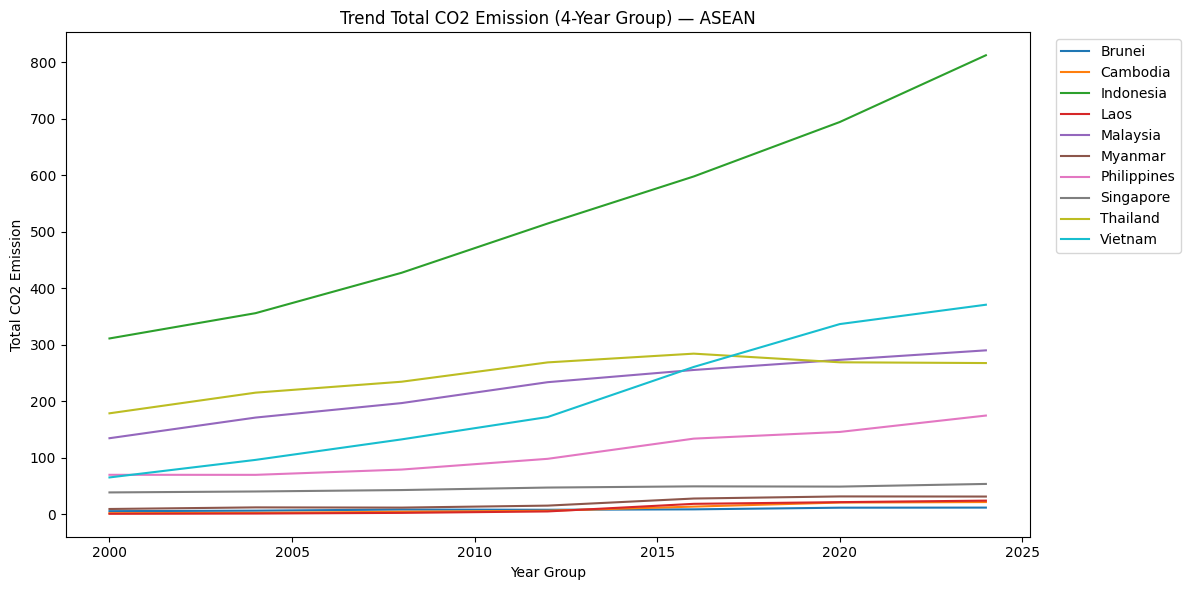

In [69]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_4y, x="year_group", y="co2_total", hue="country")
plt.title("Trend Total CO2 Emission (4-Year Group) — ASEAN")
plt.xlabel("Year Group")
plt.ylabel("Total CO2 Emission")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


Grafik ini membantu melihat pola tren yang lebih stabil dibandingkan data tahunan, sehingga perubahan jangka menengah lebih mudah terlihat.

## Trend Plot — CO2 per Capita (ASEAN)
Total emisi sering dipengaruhi ukuran populasi dan ekonomi.
Grafik ini menampilkan tren emisi per kapita untuk membandingkan intensitas emisi antar negara.

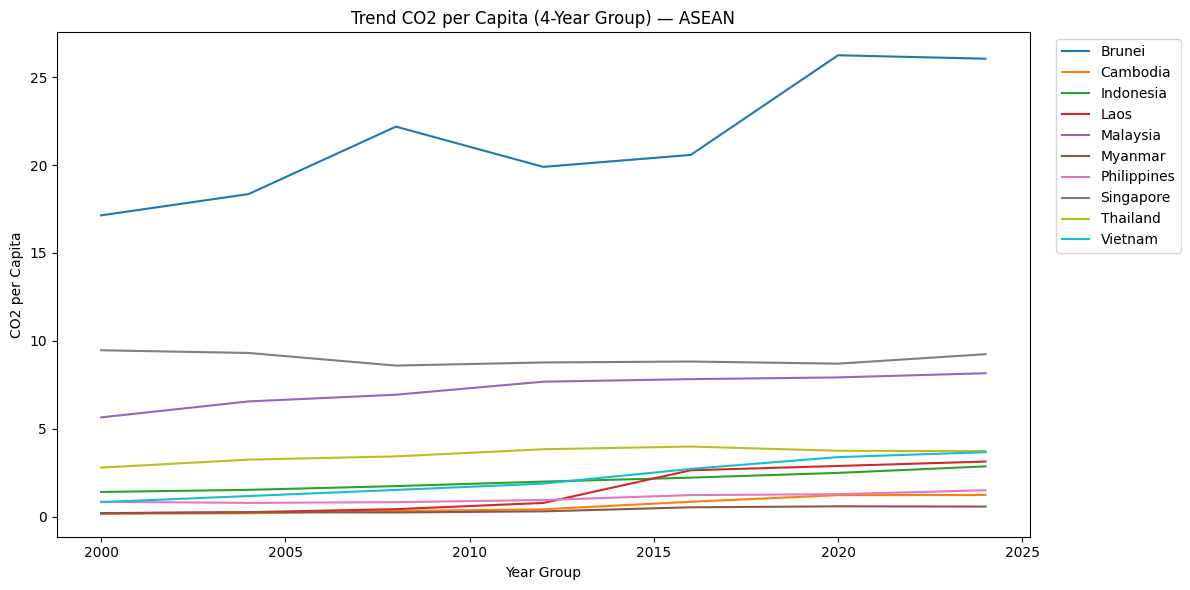

In [70]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_4y, x="year_group", y="co2_per_capita", hue="country")
plt.title("Trend CO2 per Capita (4-Year Group) — ASEAN")
plt.xlabel("Year Group")
plt.ylabel("CO2 per Capita")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


----

## Data Preparation for Statistical Checks
Analisis statistik (normalitas dan korelasi) akan lebih stabil jika dataset yang dipakai sudah fokus pada kolom numerik yang relevan dan sudah siap untuk pemeriksaan outlier.
Tahap ini menyiapkan dataset khusus untuk:
- handling outlier
- analisis univariat
- analisis bivariat
- uji normalitas
- uji korelasi

In [71]:
cols_stats = [
    "country",
    "year_group",
    "population",
    "co2_total",
    "co2_per_capita",
    "co2_coal",
    "co2_oil",
    "co2_gas",
    "co2_cement",
    "co2_flaring"
]

df_final = df_4y[cols_stats].copy()
df_final.shape


(70, 10)

Dataset df_final berisi kolom identitas dan variabel emisi utama yang dipakai untuk analisis statistik.

### Handling Outlier — Dataset for Numerical Columns
Handling outlier dilakukan pada variabel numerik tertentu agar analisis statistik berikutnya tidak terlalu dipengaruhi oleh nilai ekstrem.
Pada tahap ini, dataset numerik untuk outlier handling dipisahkan terlebih dahulu.

In [72]:
df_final_outlier_handling_done = df_final[
    ["co2_total", "co2_per_capita", "co2_coal", "co2_oil", "co2_gas", "co2_cement", "co2_flaring"]
].copy()

df_final_outlier_handling_done.shape


(70, 7)

Dataset ini hanya berisi kolom numerik yang akan ditinjau outlier-nya.

### Outlier Handling — Visual Inspection (Boxplot + Skewness)
Boxplot digunakan untuk meninjau pola outlier dan bentuk distribusi setiap variabel numerik.
Nilai skewness ditampilkan pada judul plot untuk membantu membaca distribusi secara cepat.

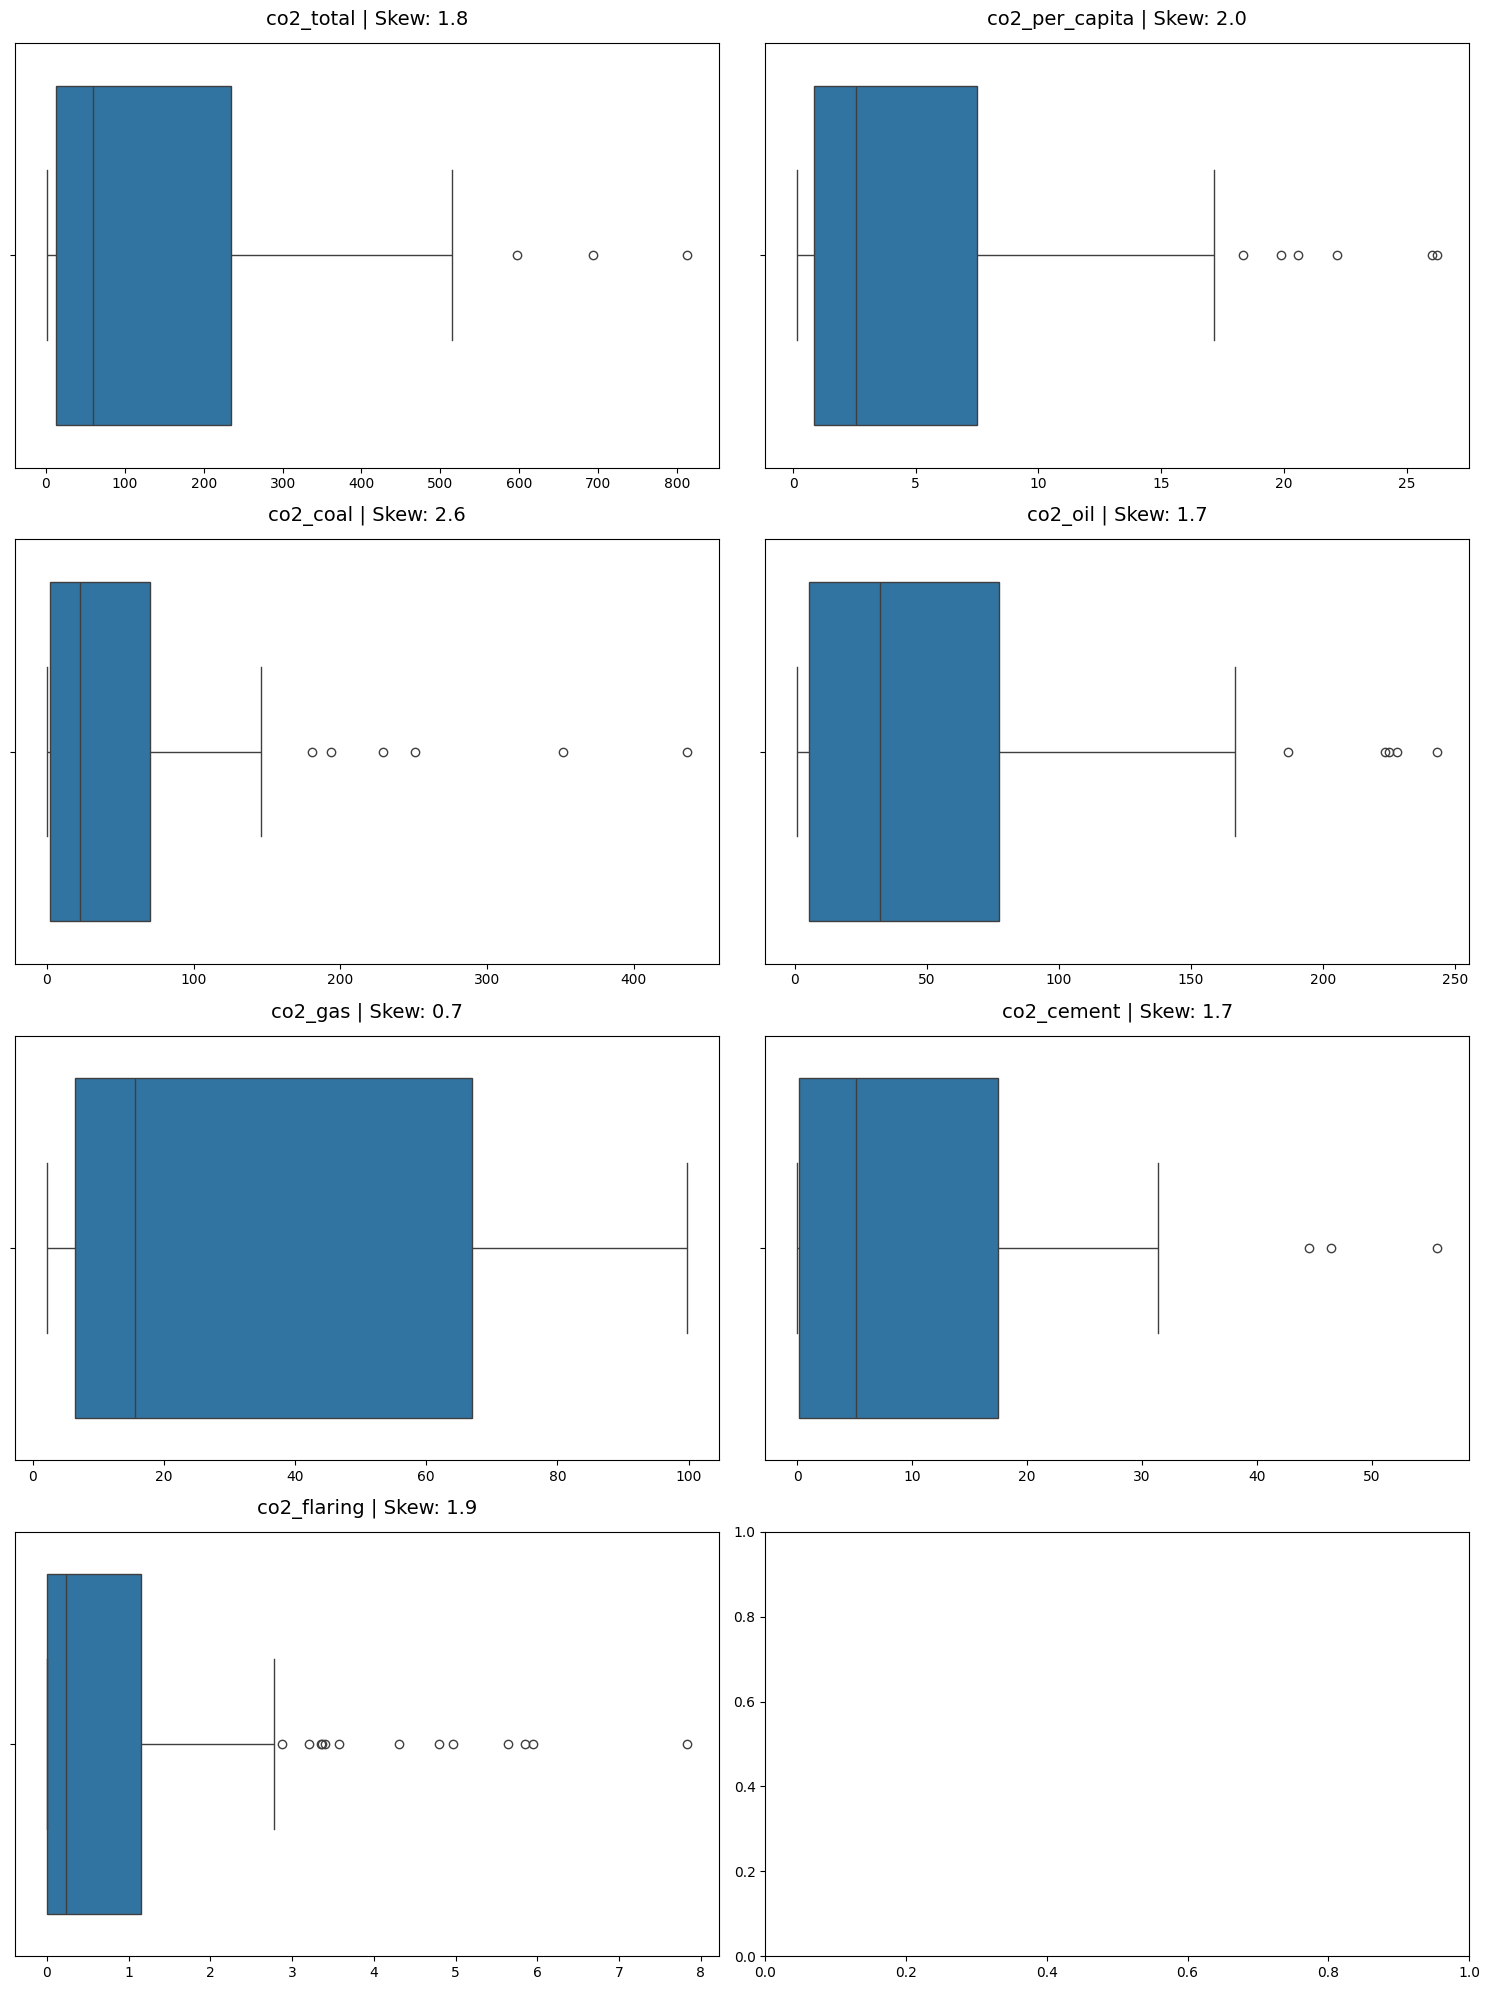

In [73]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flatten()

for i, column in enumerate(df_final_outlier_handling_done):
    sns.boxplot(x=df_final_outlier_handling_done[column], ax=axes[i])
    skew_val = round(df_final_outlier_handling_done[column].skew(), 1)
    axes[i].set_title(column + " | Skew: " + str(skew_val), fontsize=14, pad=13)
    axes[i].set_xlabel("")

for j in range(len(df_final_outlier_handling_done), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Distribusi data emisi cenderung skewed. Jika outlier terlihat dominan, hasil korelasi dan pengambilan kesimpulan perlu lebih hati-hati.

### Dataset Reconstruction After Outlier Handling
Setelah kolom numerik selesai diproses untuk outlier handling, dataset perlu digabungkan kembali dengan kolom identitas agar analisis berikutnya tetap memiliki konteks negara dan periode waktu

In [74]:
df_final_outlier_handling = df_final.drop(
    ['population', 'co2_total', 'co2_per_capita', 'co2_coal', 'co2_cement', 'co2_oil'],
    axis=1
).reset_index()

df_final_outlier_handling_done = df_final_outlier_handling_done.reset_index()

df_final_outlier_handling = pd.merge(
    df_final_outlier_handling,
    df_final_outlier_handling_done,
    on='index',
    how='outer'
)

df_final_outlier_handling = df_final_outlier_handling.drop('index', axis=1)
df_final_outlier_handling.head()


,country,year_group,co2_gas_x,co2_flaring_x,co2_total,co2_per_capita,co2_coal,co2_oil,co2_gas_y,co2_cement,co2_flaring_y
0,Brunei,2000,4.07675,0.29500,5.76725,17.13900,NaN,1.39600,4.07675,0.0,0.29500
1,Brunei,2004,5.11925,0.23200,6.65425,18.34925,NaN,1.30275,5.11925,0.0,0.23200
2,Brunei,2008,6.37575,0.40600,8.62075,22.18475,NaN,1.83925,6.37575,0.0,0.40600
3,Brunei,2012,6.09975,0.35875,8.22250,19.89525,NaN,1.76400,6.09975,0.0,0.35875
4,Brunei,2016,6.28975,0.50925,8.96175,20.57575,0.605,2.01150,6.28975,0.0,0.50925


In [76]:
df_final_outlier_handling = df_final_outlier_handling.rename(columns={
    'co2_gas_x': 'co2_gas',
    'co2_gas_y': 'co2_gas_done',
    'co2_flaring_x': 'co2_flaring',
    'co2_flaring_y': 'co2_flaring_done'
})


Dataset df_final_outlier_handling adalah versi final yang akan dipakai untuk analisis statistik setelah tahap outlier handling.

### Final Dataset Preview
Tahap ini memastikan dataset sudah terbentuk dengan benar sebelum analisis statistik dilakukan.

In [77]:
pd.set_option('display.max_rows', None)
df_final_outlier_handling.head()


,country,year_group,co2_gas,co2_flaring,co2_total,co2_per_capita,co2_coal,co2_oil,co2_gas_done,co2_cement,co2_flaring_done
0,Brunei,2000,4.07675,0.29500,5.76725,17.13900,NaN,1.39600,4.07675,0.0,0.29500
1,Brunei,2004,5.11925,0.23200,6.65425,18.34925,NaN,1.30275,5.11925,0.0,0.23200
2,Brunei,2008,6.37575,0.40600,8.62075,22.18475,NaN,1.83925,6.37575,0.0,0.40600
3,Brunei,2012,6.09975,0.35875,8.22250,19.89525,NaN,1.76400,6.09975,0.0,0.35875
4,Brunei,2016,6.28975,0.50925,8.96175,20.57575,0.605,2.01150,6.28975,0.0,0.50925


### Univariate Analysis — Descriptive Statistics
Analisis univariat dilakukan untuk memahami karakteristik masing-masing variabel:
* pusat distribusi
* variasi
* indikasi skewness

In [78]:
df_final_outlier_handling.describe()


,year_group,co2_gas,co2_flaring,co2_total,co2_per_capita,co2_coal,co2_oil,co2_gas_done,co2_cement,co2_flaring_done
count,70.000000,56.000000,70.000000,70.000000,70.000000,64.000000,70.000000,56.000000,70.000000,70.000000
mean,2012.000000,34.003371,1.116568,141.019921,4.905504,55.370430,52.337764,34.003371,9.745082,1.116568
std,8.057762,33.377957,1.826139,173.263938,6.328694,84.307162,60.694525,33.377957,12.383519,1.826139
min,2000.000000,2.129750,0.000000,1.101500,0.169500,0.007250,0.964750,2.129750,0.000000,0.000000
25%,2004.000000,6.354250,0.000000,12.788750,0.838375,1.893813,5.256375,6.354250,0.140563,0.000000
50%,2012.000000,15.601625,0.232500,59.673250,2.570375,22.346250,32.400000,15.601625,5.131875,0.232500
75%,2020.000000,66.945937,1.148688,234.537875,7.496125,70.540188,77.450688,66.945937,17.481063,1.148688
max,2024.000000,99.701000,7.824500,812.220000,26.242500,436.117000,243.183000,99.701000,55.651000,7.824500


Ringkasan statistik ini menjadi dasar untuk memahami seberapa besar variasi antar variabel dan apakah ada indikasi nilai ekstrem.

Analisis skewness digunakan untuk mengukur seberapa tidak simetris distribusi masing-masing variabel.

In [79]:
df_final_outlier_handling[
    ["co2_total", "co2_per_capita", "co2_coal", "co2_oil", "co2_gas", "co2_cement", "co2_flaring"]
].skew()


,0
co2_total,1.806172
co2_per_capita,2.001371
co2_coal,2.616261
co2_oil,1.684782
co2_gas,0.698439
co2_cement,1.669700
co2_flaring,1.891012


Skewness tinggi sering muncul pada data emisi karena beberapa negara memiliki skala emisi jauh lebih besar dibanding yang lain.

### Normality Test
Uji normalitas dilakukan untuk menentukan metode korelasi yang paling tepat.
Jika distribusi tidak normal, korelasi Spearman biasanya lebih robust dibanding Pearson.

In [80]:
from scipy.stats import shapiro

cols_test = ["co2_total", "co2_per_capita", "co2_coal", "co2_oil", "co2_gas", "co2_cement", "co2_flaring"]

normality_results = {}

for col in cols_test:
    stat, p_value = shapiro(df_final_outlier_handling[col].dropna())
    normality_results[col] = p_value

normality_results


{'co2_total': np.float64(6.639411334475562e-09),
 'co2_per_capita': np.float64(2.254896340612622e-10),
 'co2_coal': np.float64(1.2422010647594104e-10),
 'co2_oil': np.float64(9.125613057356264e-09),
 'co2_gas': np.float64(1.9949527941106483e-07),
 'co2_cement': np.float64(9.950696098401823e-09),
 'co2_flaring': np.float64(2.667076856138272e-11)}

Jika p-value < 0.05, distribusi variabel tersebut cenderung tidak normal. Kondisi ini umum pada data ekonomi, energi, emisi.

### Bivariate Analysis — Correlation
Korelasi Spearman digunakan untuk mengukur hubungan monotonic antar variabel tanpa asumsi normalitas dan linearitas yang ketat.
Sebagai pembanding, korelasi Pearson juga dihitung untuk melihat perbedaan pola hubungan jika asumsi linear diterapkan.

In [81]:
corr_spearman = df_final_outlier_handling[cols_test].corr(method="spearman")
corr_spearman


,co2_total,co2_per_capita,co2_coal,co2_oil,co2_gas,co2_cement,co2_flaring
co2_total,1.000000,0.257248,0.899451,0.971236,0.816063,0.842120,0.749884
co2_per_capita,0.257248,1.000000,0.167811,0.177395,0.179904,-0.098410,0.277803
co2_coal,0.899451,0.167811,1.000000,0.829487,0.623666,0.926087,0.790572
co2_oil,0.971236,0.177395,0.829487,1.000000,0.827614,0.815957,0.706811
co2_gas,0.816063,0.179904,0.623666,0.827614,1.000000,0.623183,0.594417
co2_cement,0.842120,-0.098410,0.926087,0.815957,0.623183,1.000000,0.697437
co2_flaring,0.749884,0.277803,0.790572,0.706811,0.594417,0.697437,1.000000


Korelasi tinggi antara co2_total dan co2_coal, co2_oil, dan co2_gas menunjukkan bahwa SDA tidak terbarukan sangat berkontribusi pada total emisi.

In [82]:
corr_pearson = df_final_outlier_handling[cols_test].corr(method="pearson")
corr_pearson


,co2_total,co2_per_capita,co2_coal,co2_oil,co2_gas,co2_cement,co2_flaring
co2_total,1.000000,-0.172998,0.946169,0.961307,0.767106,0.773413,0.688480
co2_per_capita,-0.172998,1.000000,-0.122159,-0.198301,-0.174258,-0.237849,-0.048367
co2_coal,0.946169,-0.122159,1.000000,0.844005,0.540965,0.766370,0.517899
co2_oil,0.961307,-0.198301,0.844005,1.000000,0.768563,0.669865,0.752030
co2_gas,0.767106,-0.174258,0.540965,0.768563,1.000000,0.432154,0.657770
co2_cement,0.773413,-0.237849,0.766370,0.669865,0.432154,1.000000,0.432245
co2_flaring,0.688480,-0.048367,0.517899,0.752030,0.657770,0.432245,1.000000


Jika korelasi Spearman dan Pearson berbeda jauh, hubungan antar variabel kemungkinan tidak linear atau dipengaruhi distribusi skewed.

### Correlation Heatmap (Spearman)
Visualisasi heatmap memudahkan membaca hubungan antar variabel dalam satu tampilan.

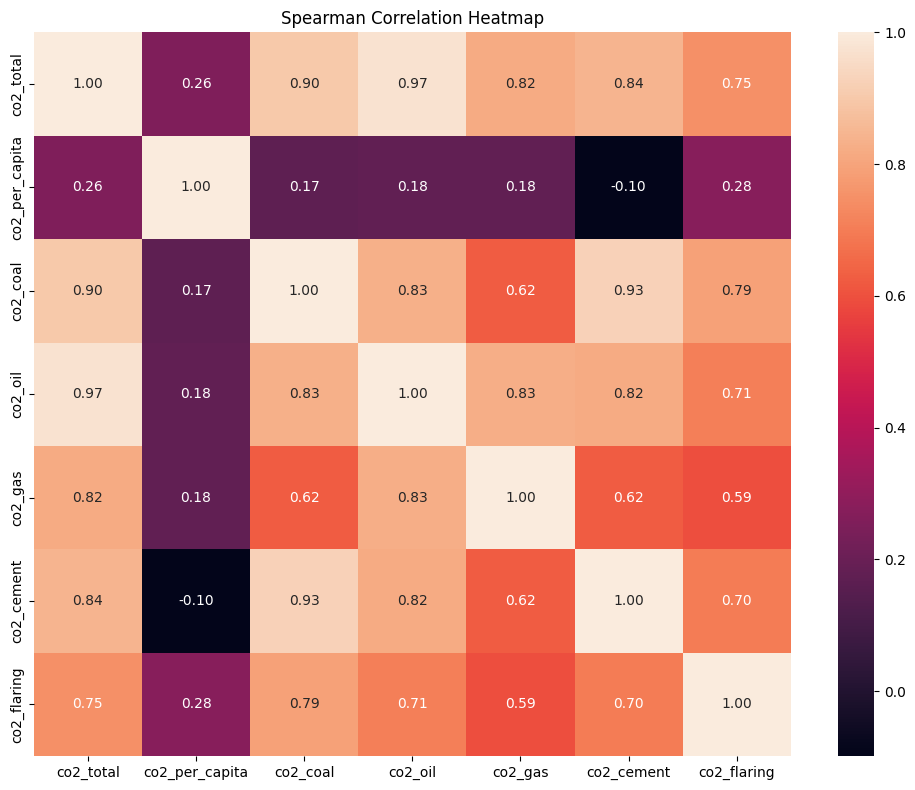

In [83]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_spearman, annot=True, fmt=".2f")
plt.title("Spearman Correlation Heatmap")
plt.tight_layout()
plt.show()


Heatmap membantu melihat variabel mana yang paling terkait kuat dengan co2_total dan apakah antar sumber emisi saling berkorelasi tinggi.

**Summary** 
Tahap ini menghasilkan beberapa temuan metodologis penting:
- distribusi variabel emisi cenderung skewed
- normalitas tidak selalu terpenuhi
- korelasi Spearman lebih aman sebagai acuan hubungan antar variabel
- Dengan baseline ini, analisis berikutnya seperti:
- ranking perubahan emisi antar periode
- decomposition kontribusi sumber emisi
- dapat dilakukan dengan asumsi yang lebih defensible.

----

## Ranking and Decomposition
### Preparing Dataset for Ranking and Decomposition 
Analisis ranking dan decomposition membutuhkan dataset yang stabil secara temporal, aman dari outlier ekstrem, dan tetap memiliki konteks negara serta periode waktu.
Dataset df_4y_handling_outlier disiapkan dengan pendekatan berikut:
- basis data menggunakan hasil grouping 4 tahunan
- handling outlier hanya diterapkan pada kolom numerik
- kolom identitas country dan year_group tetap dipertahankan

In [84]:
cols_identity = ["country", "year_group"]

cols_numeric = [
    "co2_total",
    "co2_per_capita",
    "co2_coal",
    "co2_oil",
    "co2_gas",
    "co2_cement",
    "co2_flaring"
]

df_4y_handling_outlier = df_4y[cols_identity + cols_numeric].copy()
df_4y_handling_outlier.shape


(70, 9)

Dataset ini menjadi baseline untuk seluruh analisis ranking dan decomposition.

#### Outlier Handling on 4-Year Aggregated Data
Outlier ditinjau dan ditangani pada level data 4 tahunan agar fluktuasi tahunan tidak mendominasi analisis perubahan jangka menengah.
Pendekatan clipping berbasis IQR digunakan untuk menjaga struktur data tanpa menghapus observasi

In [85]:
Q1 = df_4y_handling_outlier[cols_numeric].quantile(0.25)
Q3 = df_4y_handling_outlier[cols_numeric].quantile(0.75)
IQR = Q3 - Q1

for col in cols_numeric:
    lower = Q1[col] - 1.5 * IQR[col]
    upper = Q3[col] + 1.5 * IQR[col]
    df_4y_handling_outlier[col] = df_4y_handling_outlier[col].clip(lower=lower, upper=upper)


Handling outlier dilakukan tanpa memutus relasi negara dan periode waktu, sehingga dataset tetap siap untuk analisis berbasis perbandingan.

#### Dataset Check
Sebelum masuk ke ranking dan decomposition, struktur dataset diperiksa kembali untuk memastikan konteks dan variabel utama tersedia.

In [86]:
df_4y_handling_outlier.head()


,country,year_group,co2_total,co2_per_capita,co2_coal,co2_oil,co2_gas,co2_cement,co2_flaring
0,Brunei,2000,5.76725,17.13900,NaN,1.39600,4.07675,0.0,0.29500
1,Brunei,2004,6.65425,17.48275,NaN,1.30275,5.11925,0.0,0.23200
2,Brunei,2008,8.62075,17.48275,NaN,1.83925,6.37575,0.0,0.40600
3,Brunei,2012,8.22250,17.48275,NaN,1.76400,6.09975,0.0,0.35875
4,Brunei,2016,8.96175,17.48275,0.605,2.01150,6.28975,0.0,0.50925


In [87]:
df_4y_handling_outlier.shape

(70, 9)

## Ranking

### Defining Comparison Periods
Ranking dilakukan dengan membandingkan periode awal dan periode akhir pada data 4 tahunan.
Pendekatan ini digunakan agar perubahan yang dianalisis merepresentasikan pergeseran jangka menengah, bukan fluktuasi tahunan.

Periode yang digunakan:
- periode awal: year_group terawal
- periode akhir: year_group terakhir

In [88]:
start_period = df_4y_handling_outlier["year_group"].min()
end_period = df_4y_handling_outlier["year_group"].max()

start_period, end_period


(2000, 2024)

Dua periode ini menjadi baseline untuk seluruh ranking dan decomposition.

### Preparing Dataset for Ranking
Dataset difilter hanya pada dua periode pembanding, lalu diubah ke format wide agar perubahan antar periode dapat dihitung secara eksplisit.

In [90]:
df_compare = df_4y_handling_outlier[
    df_4y_handling_outlier["year_group"].isin([start_period, end_period])
]

df_wide = df_compare.pivot(
    index="country",
    columns="year_group",
    values=[
        "co2_total",
        "co2_per_capita",
        "co2_coal",
        "co2_oil",
        "co2_gas",
        "co2_cement",
        "co2_flaring"
    ]
)

df_wide


co2_total             co2_per_capita            co2_coal  \
year_group        2000        2024           2000      2024      2000   
country                                                                 
Brunei         5.76725   12.052000       17.13900  17.48275       NaN   
Cambodia       2.15975   21.883000        0.16950   1.24100       NaN   
Indonesia    311.25950  567.161562        1.41025   2.86500  67.92250   
Laos           1.10150   24.400000        0.19775   3.14000   0.06925   
Malaysia     134.79750  290.224000        5.65175   8.16200  12.14100   
Myanmar        9.60000   31.603000        0.20875   0.58000   1.19000   
Philippines   70.06475  174.878000        0.85300   1.51000  15.20325   
Singapore     38.90900   53.919000        9.46725   9.24500   0.00725   
Thailand     178.84300  267.760000        2.79525   3.73600  37.26425   
Vietnam       65.42750  370.931000        0.83375   3.67300  26.28400   

                          co2_oil               co2_gas         co2_cement  \
year_group        2024       2000        2024      2000    2024       2000   
country                                                                      
Brunei         3.00300    1.39600    3.787000   4.07675   5.073    0.00000   
Cambodia       6.07800    2.15975    9.783000       NaN     NaN    0.00000   
Indonesia    173.50975  160.04200  185.742156  58.04500  99.701   17.42575   
Laos          16.67800    0.96475    2.837000       NaN     NaN    0.06725   
Malaysia      97.57000   60.64050   79.098000  52.29000  95.277    6.94800   
Myanmar        3.26400    5.59350   17.253000   2.58075   7.976    0.18125   
Philippines   92.14200   48.27100   64.101000   2.12975   8.501    4.40725   
Singapore      1.14300   32.97800   31.822000   5.92425  20.955    0.00000   
Thailand      60.21600   79.32750  105.336000  44.44825  84.088   17.49950   
Vietnam      173.50975   26.72300   83.997000   3.73375  12.132    7.46050   

                       co2_flaring            
year_group        2024        2000      2024  
country                                       
Brunei        0.000000    0.295000  0.190000  
Cambodia      6.022000    0.000000  0.000000  
Indonesia    30.018000    2.871719  2.871719  
Laos          4.885000    0.000000  0.000000  
Malaysia     15.400000    2.778250  2.871719  
Myanmar       3.091000    0.054500  0.019000  
Philippines  10.024000    0.053250  0.110000  
Singapore     0.000000    0.000000  0.000000  
Thailand     17.724000    0.303750  0.395000  
Vietnam      43.491812    1.226750  1.129000

Struktur wide memudahkan perhitungan selisih antar periode untuk setiap negara.

### Ranking — Absolute Change in Total CO₂ Emissions
Ranking pertama dilakukan berdasarkan perubahan absolut total emisi CO2.
Pendekatan ini menyoroti negara dengan kontribusi perubahan emisi terbesar secara kuantitatif.

In [92]:
df_ranking_abs = (
    df_wide["co2_total"][end_period] - df_wide["co2_total"][start_period]
).sort_values(ascending=False)

df_ranking_abs = df_ranking_abs.reset_index()
df_ranking_abs.insert(0, "no", range(1, len(df_ranking_abs) + 1))
df_ranking_abs


,no,country,0
0,1,Vietnam,305.503500
1,2,Indonesia,255.902062
2,3,Malaysia,155.426500
3,4,Philippines,104.813250
4,5,Thailand,88.917000
5,6,Laos,23.298500
6,7,Myanmar,22.003000
7,8,Cambodia,19.723250
8,9,Singapore,15.010000
9,10,Brunei,6.284750


**Insight**

Vietnam dan Indonesia menunjukkan kenaikan absolut emisi CO2 paling tinggi dibanding negara ASEAN lain di periode 2000-2024. Selisih keduanya dengan Malaysia, Filipina, dan Thailand cukup besar, sehingga kenaikan emisi terlihat sangat terkonsentrasi di dua negara teratas. Malaysia, Filipina, dan Thailand masih naik, tetapi skalanya jauh lebih kecil dibanding Vietnam dan Indonesia. Negara beremisi kecil seperti Laos, Myanmar, Kamboja, Singapura, dan Brunei juga meningkat, namun kontribusinya terhadap total kenaikan regional relatif rendah. Pola ini mengindikasikan bahwa pertumbuhan emisi regional terutama didorong oleh negara dengan skala ekonomi dan aktivitas energi terbesar.

### Ranking — Change in CO₂ per Capita
Ranking kedua dilakukan berdasarkan perubahan emisi per kapita, untuk melihat perubahan intensitas emisi terlepas dari ukuran populasi.

In [96]:
df_ranking_pc = (
    df_wide["co2_per_capita"][end_period] - df_wide["co2_per_capita"][start_period]
).sort_values(ascending=False)

df_ranking_pc = df_ranking_pc.reset_index()
df_ranking_pc.insert(0, "no", range(1, len(df_ranking_pc) + 1))
df_ranking_pc


,no,country,0
0,1,Laos,2.94225
1,2,Vietnam,2.83925
2,3,Malaysia,2.51025
3,4,Indonesia,1.45475
4,5,Cambodia,1.07150
5,6,Thailand,0.94075
6,7,Philippines,0.65700
7,8,Myanmar,0.37125
8,9,Brunei,0.34375
9,10,Singapore,-0.22225


**Insight**

Laos menjadi negara dengan kenaikan emisi CO2 per kapita terbesar di periode 2000-2024. Indonesia masih mengalami kenaikan per kapita, tetapi berada di tengah dibanding negara lain. Kenaikan per kapita di Kamboja, Thailand, Filipina, dan Myanmar relatif kecil. Brunei hampir stagnan, sedangkan Singapura satu‑satunya yang mengalami penurunan per kapita. Ini menunjukkan perubahan emisi per orang tidak selalu sejalan dengan kenaikan total emisi regional

## Decomposition

### Selecting Focus Countries for Decomposition
Decomposition difokuskan pada negara-negara dengan perubahan absolut terbesar, agar analisis tetap tajam dan relevan.

In [99]:
top_countries = df_ranking_abs["country"].head(5).tolist()
top_countries


['Vietnam', 'Indonesia', 'Malaysia', 'Philippines', 'Thailand']

### Decomposition of Emission Changes by Source

Decomposition dilakukan dengan menghitung kontribusi perubahan masing-masing sumber emisi terhadap total perubahan emisi.

In [100]:
sources = ["co2_coal", "co2_oil", "co2_gas", "co2_cement", "co2_flaring"]

decomp_data = {}

for src in sources:
    decomp_data[src] = (
        df_wide[src][end_period] - df_wide[src][start_period]
    ).loc[top_countries]

df_decomp = pd.DataFrame(decomp_data)
df_decomp


,co2_coal,co2_oil,co2_gas,co2_cement,co2_flaring
country,,,,,
Vietnam,147.22575,57.274000,8.39825,36.031312,-0.097750
Indonesia,105.58725,25.700156,41.65600,12.592250,0.000000
Malaysia,85.42900,18.457500,42.98700,8.452000,0.093469
Philippines,76.93875,15.830000,6.37125,5.616750,0.056750
Thailand,22.95175,26.008500,39.63975,0.224500,0.091250


Kenaikan emisi Vietnam paling besar didorong paling besar oleh batubara. Indonesia juga naik tinggi dengan kontribusi kuat dari batubara dan gas. Malaysia memiliki kenaikan yang relatif seimbang antara batubara dan gas. Filipina meningkat terutama dari batubara sementara sumber lain lebih kecil. Thailand berbeda karena kenaikan gas dan minyak relatif besar sedangkan batubara lebih kecil

### Decomposition Visualization — Stacked Bar Chart
Visualisasi stacked bar digunakan untuk menunjukkan bagaimana berbagai sumber emisi membentuk total perubahan emisi pada setiap negara.

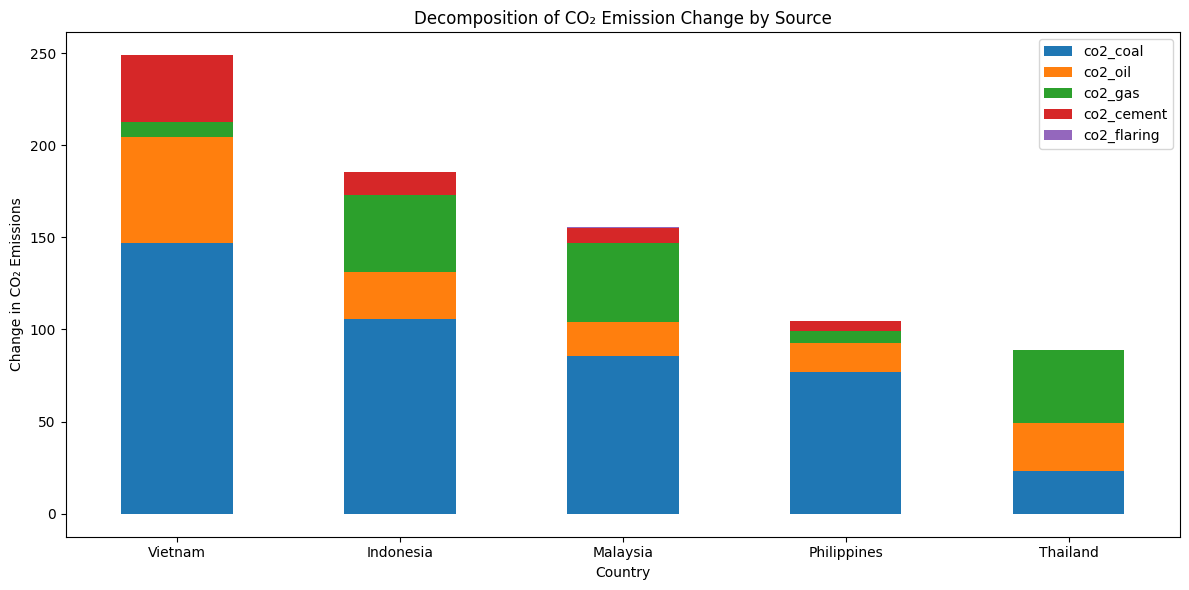

In [101]:
df_decomp.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6)
)

plt.title("Decomposition of CO₂ Emission Change by Source")
plt.xlabel("Country")
plt.ylabel("Change in CO₂ Emissions")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Visualisasi ini memperjelas apakah peningkatan atau penurunan emisi didorong oleh dominasi batu bara, gas atau perubahan pada sumber lain

### Key Findings from Ranking and Decomposition
Analisis ranking menunjukkan negara dengan perubahan emisi paling signifikan secara absolut maupun per kapita.
Decomposition mengungkap bahwa perubahan tersebut tidak bersifat homogen, melainkan didorong oleh kombinasi sumber emisi yang berbeda di setiap negara.

Temuan ini menjadi dasar untuk:
- interpretasi kebijakan energi
- perbandingan lintas negara
- diskusi lanjutan mengenai transisi energi di kawasan ASEAN

## Conclusion
- Secara sederhana, emisi CO2 di ASEAN selama 2000–2024 jelas cenderung naik, dan polanya jadi lebih mudah dibaca saat dikelompokkan per 4 tahun.
- Data emisi tidak berdistribusi normal dan cenderung skewed, jadi korelasi Spearman lebih tepat untuk membaca hubungan antar variabel.
- Total emisi paling kuat dipengaruhi oleh sumber fosil—terutama batubara, lalu minyak dan gas—yang menegaskan dominasi energi fosil di kawasan ini.
- Dari sisi perubahan total, Vietnam dan Indonesia menjadi pendorong utama kenaikan emisi regional.
- Jika dilihat per kapita, polanya berbeda: Laos naik paling besar, sementara Singapura justru turun.
- Decomposition menunjukkan bahwa lonjakan emisi di negara teratas terutama datang dari batubara dan gas.
